<a href="https://colab.research.google.com/github/rabrn/meus_projetos/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# instalar o pandas profiling
!pip install -U ydata-profiling -q
!pip install --upgrade pip -q
!pip install --upgrade Pillow -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.6 MB/s eta 0:00:00


In [2]:
# instalar os pacotes necessários
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

A seguir os dados serão importados e submetidos a um análise exploratória inicial.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# verificar a dimensão do dataset
print("Dimensão do dataset:", df.shape)

# mostrar as cinco primeiras entradas
df.head()

Dimensão do dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Análise Exploratória

O método `describe()` fornece um resumo estatístico dos dados, evidenciado que as componentes principais (`V1`, `V2`, ..., `V28`) possuem valores relativamente próximos entre si. Além disso, os valores das transações variam entre U\$ 0,00 e U\$ 25691,16, com desvio padrão de U\$ 250,12, média de U\$ 88,34 e mediana de U\$ 22,00, indicando que grande parte das operações do *dataset* é de baixo valor.



In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# verificar se há valores ausentes
df.isnull().sum().max()

0

Do resultado acima, percebe-se que não há dados faltantes no *dataset*. No entanto, abaixo verifica-se um desbalanceamento, visto que o número de transações faudulentas representam 0,17% do total.


As transações faudulentas são 0.17% do conjunto de dados.




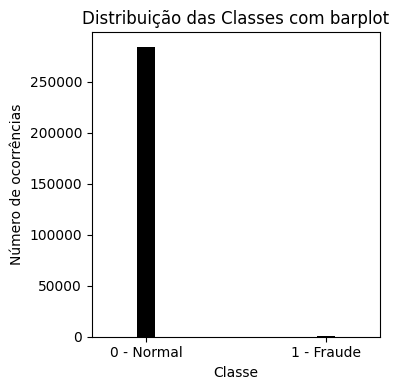

In [6]:
# verificar o balanceamento do dataset com valores numéricos
print('As transações faudulentas são {:.2f}% do conjunto de dados.\n\n'.format(100 * df[df['Class'] == 1].shape[0] / df.shape[0]))

# verificar o balanceamento do dataset de forma gráfica
target_counts = df['Class'].value_counts()
fig1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(4,4),sharex=True)
target_counts.plot(kind='bar', ax=axes1, color='k', width=0.1)
axes1.set_title('Distribuição das Classes com barplot')
axes1.set_xlabel('Classe')
axes1.set_ylabel('Número de ocorrências')
axes1.set_xticklabels(['0 - Normal', '1 - Fraude'])
axes1.tick_params(axis='x', rotation=0)
plt.tight_layout()

A seguir são mostrados os histogramas das variáveis `Time` e `Amount`, bem como o *boxplot* da última, para quando há (`Class == 1`) e quando não há (`Class == 0`) fraude. Nota-se que ambas são menores quando há fraude, e que `Amount` apresenta uma distribuição mais espalhada nessa situação.

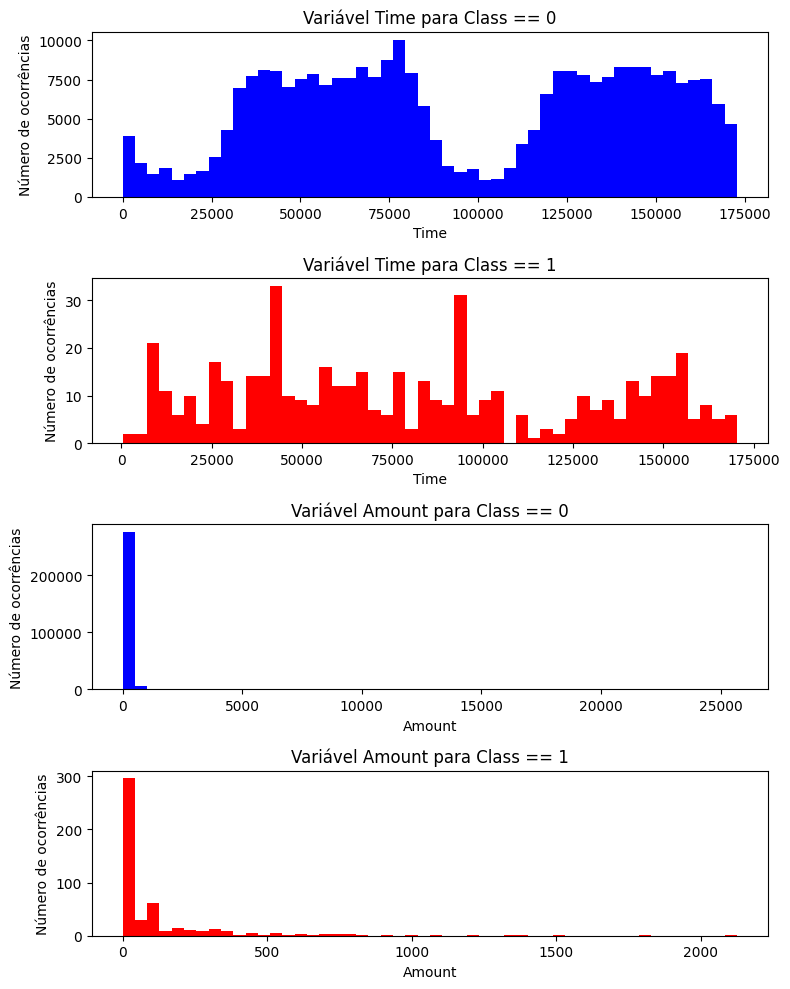

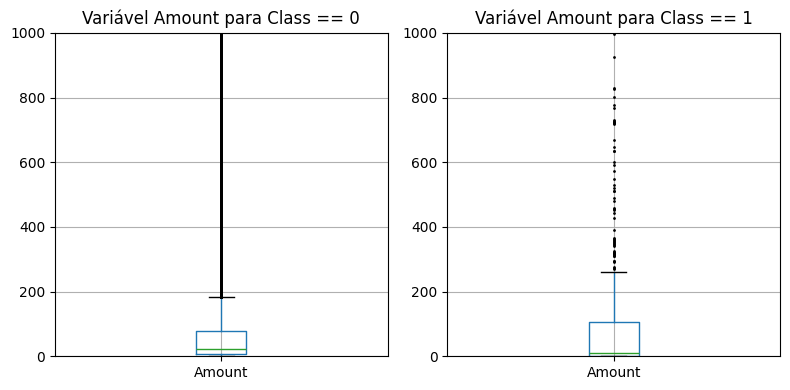

In [7]:
# separar os casos em que não há fraude dos que há
fraude_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0]

# plotar os histogramas
fig2, axes2 = plt.subplots(nrows=4, ncols=1, figsize=(8,10))

normal_df['Time'].plot(kind='hist', ax=axes2[0], bins=50, color='b')
axes2[0].set_title('Variável Time para Class == 0')
axes2[0].set_xlabel('Time')
axes2[0].set_ylabel('Número de ocorrências')
plt.tight_layout()

fraude_df['Time'].plot(kind='hist', ax=axes2[1], bins=50, color='r')
axes2[1].set_title('Variável Time para Class == 1')
axes2[1].set_xlabel('Time')
axes2[1].set_ylabel('Número de ocorrências')
plt.tight_layout()

normal_df['Amount'].plot(kind='hist', ax=axes2[2], bins=50, color='b')
axes2[2].set_title('Variável Amount para Class == 0')
axes2[2].set_xlabel('Amount')
axes2[2].set_ylabel('Número de ocorrências')

fraude_df['Amount'].plot(kind='hist', ax=axes2[3], bins=50, color='r')
axes2[3].set_title('Variável Amount para Class == 1')
axes2[3].set_xlabel('Amount')
axes2[3].set_ylabel('Número de ocorrências')

plt.tight_layout()

# plotar os boxplots
fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

normal_df.boxplot(['Amount'],ax=axes3[0], flierprops={'markersize': 1})
axes3[0].set_title('Variável Amount para Class == 0')
axes3[0].set_ylim([0,1000])

fraude_df.boxplot(['Amount'],ax=axes3[1], flierprops={'markersize': 1})
axes3[1].set_title('Variável Amount para Class == 1')
axes3[1].set_ylim([0,1000])

plt.tight_layout()

  Dos *boxplots* percebe-se que há muitos *outliers* na variável  ```Amount```, e que a presença ou não de fraude parece influenciar bastante sua distribuição, indicando sua importância para o modelo.


## Preparação dos Dados

A seguir as variáveis `Time` e `Amount` serão padronizadas e normalizadas. Esse procedimento é realizado após o `split`, a fim de evitar vazamentos de informação entre os conjuntos de teste e de treino (Fonte: https://medium.com/@spinjosovsky/normalize-data-before-or-after-split-of-training-and-testing-data-7b8005f81e26). Além disso, devido ao desbalanceamento constatado, os dados de treino passaram por um processo de *undersampling* antes da implementação dos modelos.

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

Nesse caso, utilizou-se `stratify=y` para que a proporção de valores presente em `y` seja aproximadamente mantida nos conjuntos de treino e teste, algo recomendável em `datasets` desbalanceados (Fonte: https://realpython.com/train-test-split-python-data/).

In [15]:
std_scaler = StandardScaler()
X_train[['Time','Amount']] = std_scaler.fit_transform(X_train[['Time','Amount']])
X_test[['Time','Amount']] = std_scaler.fit_transform(X_test[['Time','Amount']])
mixmax = MinMaxScaler()
X_train[['Time', 'Amount']] = mixmax.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = mixmax.fit_transform(X_test[['Time', 'Amount']])

Class
0    418
1    418
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

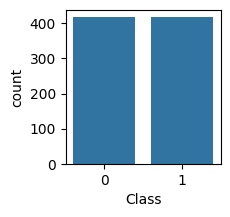

In [16]:
# balancear conjunto de traino
res = RandomUnderSampler()
X_train_res, y_train_res = res.fit_resample(X_train, y_train)

# verificar nova distribuição após o undersampling
print(pd.Series(y_train_res).value_counts())
fig3, axes3 = plt.subplots(figsize=(2, 2))
sns.countplot(x=y_train_res, ax=axes3)

A figura acima evidencia o balanceamento dos dados em virtude do processo de *undersampling*, lembrando que, no *dataset* original, apenas 0,17% dos casos correspodiam a transações fraudulentas. A partir dos dados balanceados, podemos comparar as matrizes de correlação antes e depois do *undersampling*.

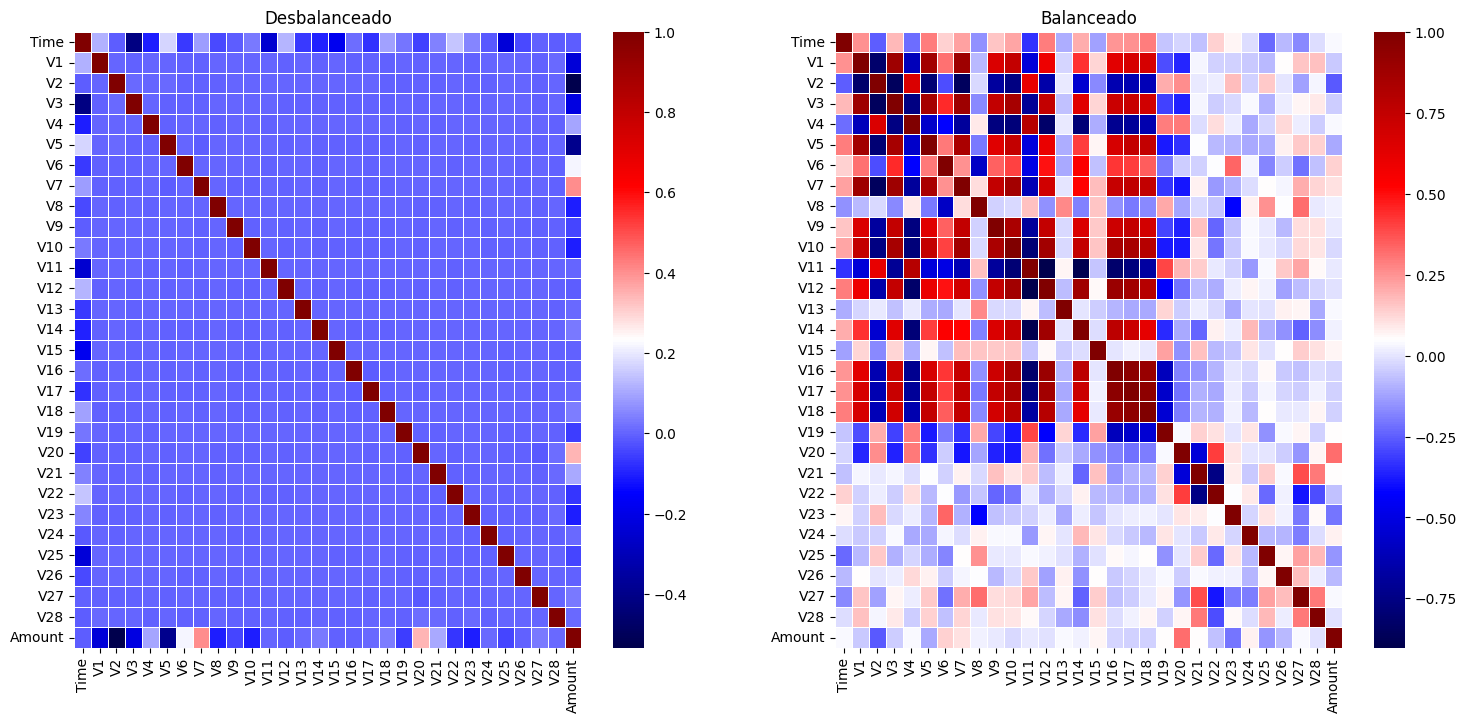

In [17]:
corr = X_train.corr()
corr_res = pd.DataFrame(X_train_res).corr()

fig4, axes4 = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.4, cmap="seismic", ax=axes4[0])
axes4[0].set_title('Desbalanceado')

sns.heatmap(corr_res, xticklabels=corr_res.columns, yticklabels=corr_res.columns,
            linewidths=.4, cmap="seismic", ax=axes4[1])
axes4[1].set_title('Balanceado')

plt.show()

## Modelo de Machine Learning

A seguir serão implementados dois modelos: regressão logística e árvore de decisão. Para cada um, serão apresentadas a matriz de confusão e algumas métricas relevantes. Como o *dataset* original é desbalanceado, a acurácia pode não ser a métrica mais adequada, visto que o número de verdadeiros negativos pode aumentar seu valor sem que o número de verdadeiros positivos (algo essencial para o modelo, pois indica as fraudes corretamente detectadas) seja elevado. Dessa forma, também é apresentado o valor da AUC ROC.

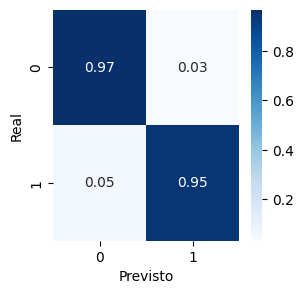


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9667    0.9830     42648
           1     0.0469    0.9459    0.0894        74

    accuracy                         0.9666     42722
   macro avg     0.5234    0.9563    0.5362     42722
weighted avg     0.9983    0.9666    0.9815     42722

Acurácia: 0.9666

AUC ROC: 0.9563



In [21]:
# regressão logistica
model_lr = LogisticRegression()
model_lr.fit(X_train_res, y_train_res)
y_pred_lr= model_lr.predict(X_test)

lr_cf_matrix = confusion_matrix(y_test, y_pred_lr, normalize='true')
fig_lr, ax_lr = plt.subplots(figsize=(3, 3))
sns.heatmap(lr_cf_matrix, annot=True, ax=ax_lr,
            fmt='.2f', cmap='Blues', cbar=True)
ax_lr.set_xlabel("Previsto")
ax_lr.set_ylabel("Real")

plt.show()

print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_lr, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_lr)))
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr)))

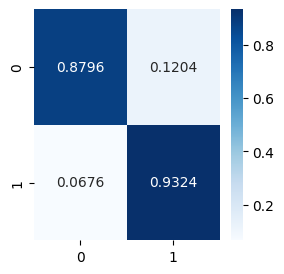


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.8796    0.9359     42648
           1     0.0133    0.9324    0.0261        74

    accuracy                         0.8797     42722
   macro avg     0.5066    0.9060    0.4810     42722
weighted avg     0.9982    0.8797    0.9343     42722

Acurácia: 0.8797

AUC ROC: 0.9060



In [22]:
# árvore de decisão
model_dt = DecisionTreeClassifier(criterion="entropy")
model_dt.fit(X_train_res, y_train_res)
y_pred_dt = model_dt.predict(X_test)

dt_cf_matrix = confusion_matrix(y_test, y_pred_dt, normalize='true')
fig_dt, ax_dt = plt.subplots(figsize=(3, 3))
sns.heatmap(dt_cf_matrix, annot=True, ax=ax_dt,
            fmt='.4f', cmap='Blues', cbar=True)
ax_lr.set_xlabel("Previsto")
ax_lr.set_ylabel("Real")
plt.show()

print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_dt, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_dt)))
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_dt)))

## Avaliar o desempenho do modelo

Conforme explicado anteriormente, a AUC ROC é uma métrica importante nesse tipo de situaçõao, assim como o *recall*. Em especial, é preciso que a taxa de verdadeiros positivos seja alta, a fim de garantir que opreçães fraudulentas sejam efetivamente detectadas. Observando esses parâmetros, percebe-se que o modelo de regressão logística teve desempenho melhor que o de árvore de decisão.

## Conclusão

O *dataset* utilizado na construção do modelo já havia passado por tranformação PCA e não apresentava dados faltantes, mas estava altamente desbalanceado. Dessa forma, além da padronização e normalização das variáveis que não haviam passado pela PCA, foi necessário balancear os dados de treino. Com isso, dois modelos de classificação foram implementados e verificou-se, através dos valores de AUC ROC e *recall*, que a regressão logística teve desempenho melhor que a árvore de decisão.